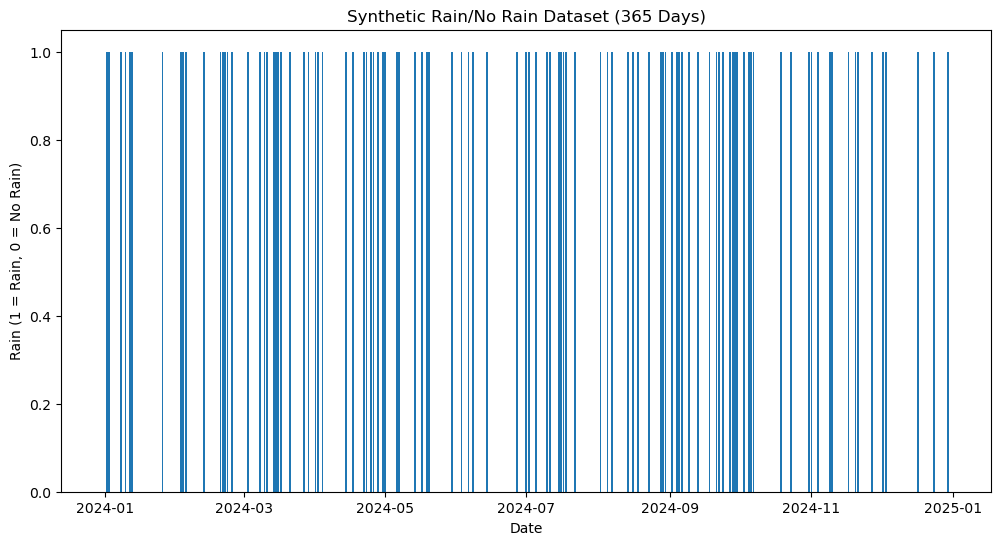

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic data for 365 days (1 = rain, 0 = no rain)
rain_data = np.random.choice([0, 1], size=365, p=[0.7, 0.3])  # 70% no rain, 30% rain
dates = pd.date_range(start='2024-01-01', periods=365)

# Create DataFrame
df = pd.DataFrame({'Date': dates, 'Rain': rain_data})

# Plot the dataset
plt.figure(figsize=(12, 6))
plt.bar(df['Date'], df['Rain'])
plt.title('Synthetic Rain/No Rain Dataset (365 Days)')
plt.xlabel('Date')
plt.ylabel('Rain (1 = Rain, 0 = No Rain)')
plt.show()


In [2]:
# Calculate total number of rain and no rain days
total_days = len(df)
rain_days = df['Rain'].sum()
no_rain_days = total_days - rain_days

# Calculate probabilities
prob_rain = rain_days / total_days
prob_no_rain = no_rain_days / total_days

# Display results
print(f"Total days: {total_days}")
print(f"Rain days: {rain_days}")
print(f"No rain days: {no_rain_days}")
print(f"Probability of rain: {prob_rain:.2f}")
print(f"Probability of no rain: {prob_no_rain:.2f}")


Total days: 365
Rain days: 105
No rain days: 260
Probability of rain: 0.29
Probability of no rain: 0.71


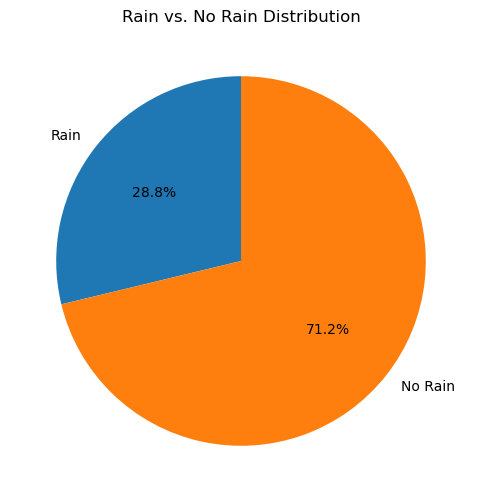

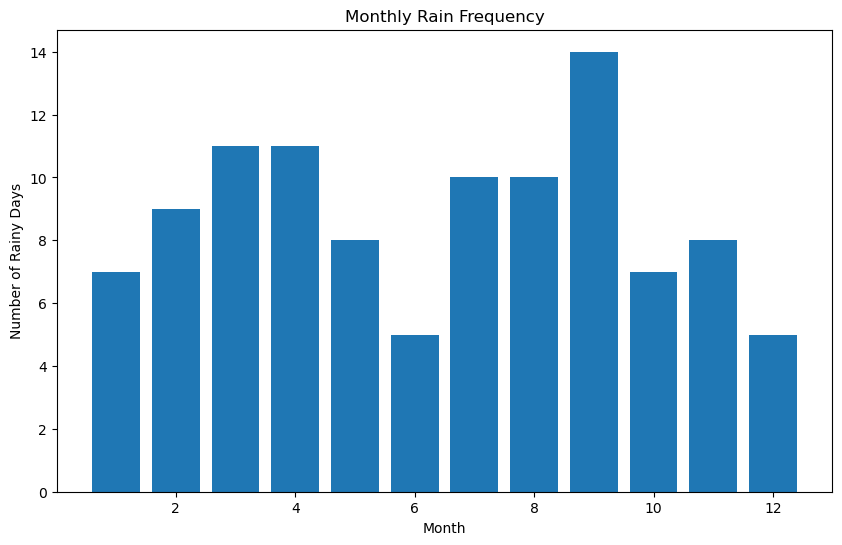

In [3]:
# Pie chart for overall distribution
plt.figure(figsize=(6, 6))
plt.pie([rain_days, no_rain_days], labels=['Rain', 'No Rain'], autopct='%1.1f%%', startangle=90)
plt.title('Rain vs. No Rain Distribution')
plt.show()

# Add month column to DataFrame
df['Month'] = df['Date'].dt.month

# Bar chart for monthly rain frequency
monthly_rain = df.groupby('Month')['Rain'].sum()
plt.figure(figsize=(10, 6))
plt.bar(monthly_rain.index, monthly_rain)
plt.title('Monthly Rain Frequency')
plt.xlabel('Month')
plt.ylabel('Number of Rainy Days')
plt.show()


In [4]:
# Calculate monthly probability of rain
monthly_prob_rain = monthly_rain / df['Month'].value_counts().sort_index()

# Display results
print("Monthly Probability of Rain:")
print(monthly_prob_rain)

# Identify highest and lowest probability months
highest_month = monthly_prob_rain.idxmax()
lowest_month = monthly_prob_rain.idxmin()

print(f"Highest probability of rain: Month {highest_month} ({monthly_prob_rain[highest_month]:.2f})")
print(f"Lowest probability of rain: Month {lowest_month} ({monthly_prob_rain[lowest_month]:.2f})")


Monthly Probability of Rain:
Month
1     0.225806
2     0.310345
3     0.354839
4     0.366667
5     0.258065
6     0.166667
7     0.322581
8     0.322581
9     0.466667
10    0.225806
11    0.266667
12    0.166667
dtype: float64
Highest probability of rain: Month 9 (0.47)
Lowest probability of rain: Month 6 (0.17)
